Here we are going to create dataset for our experiment

In [3]:
# Import YAFSfilegeneration module
import sys
sys.path.insert(1, r'C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\library')

import YAFSfilegenerationv2 as genYAFS

# Create topology

In [2]:
# windows mode
genYAFS.create_json_topology_withlinktype(
        m_value = 2,
        jumlah_node=100, 
        ram_range=(4, 10), 
        speed_range=(100, 1000), 
        storage_range=(10, 25), 
        propagasi=(5), 
        bandwith=(75000), 
        json_filename=fr'C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\topology\100m2.json'
    )

Updated topology with link types saved to: C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\topology\updatedwithlinks_100m2.json
Network Summary:

Nodes:
  Total nodes: 101
  Speed range: [103, 10000]
  RAM range: [4, 999999999]
  Node labels:
    head_node: 25
    fog_node: 50
    gateway: 25
    cloud: 1

Links:
  Total links: 221
  Bandwidth range: [75000, 125000]
  Propagation delay range: [5, 100]
  Link types:
    node_head_link: 161
    cloud_link: 25
    node_link: 22
    gateway_link: 13


# Application

D: dataset
E: evaluation 

In [4]:
num_apps = 100
deadline = (300, 50000)
ram_range = (1, 6)
storage_range = (1, 6)
module_range = (2,10)
byte_range = (1500000, 4500000)
instruction_range = (20000, 60000)
# safepathapp_win = "G:\\My Drive\\Michael Stuffs\\generation library\\generatedapp100.json"

In [5]:
for i in range (0,10):
# for i in [0]:
    safepathapp_win = fr"C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D{num_apps}_{i}.json"
    print(safepathapp_win)
    app_specs = genYAFS.create_application_specs(num_apps, deadline, ram_range, storage_range,module_range ,byte_range, instruction_range, safepathapp_win)

C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_0.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_1.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_2.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_3.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_4.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_5.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_6.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_7.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_8.json
C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D100_9.json


# population

In [9]:
for pop_id in range(0, 10):
# for pop_id in :
    # for app_count in {10,30, 50, 70, 100} :
    for app_count in {100} :    
        lambda_range = (200, 1000)
        save_json_path = fr"C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\population\100m2_P{pop_id}_D{app_count}.json"
        filepath_topo = fr"C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\topology\100m2.json"
        filepath_apps = fr"C:\Users\komputer\OneDrive\Documents\GitHub\MOFPSS-Seq2seq\evaluation_files\application\D{app_count}_{pop_id}.json"
        save_message = genYAFS.create_population_json(filepath_apps ,filepath_topo, lambda_range,save_json_path)
        print(pop_id,app_count)

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100


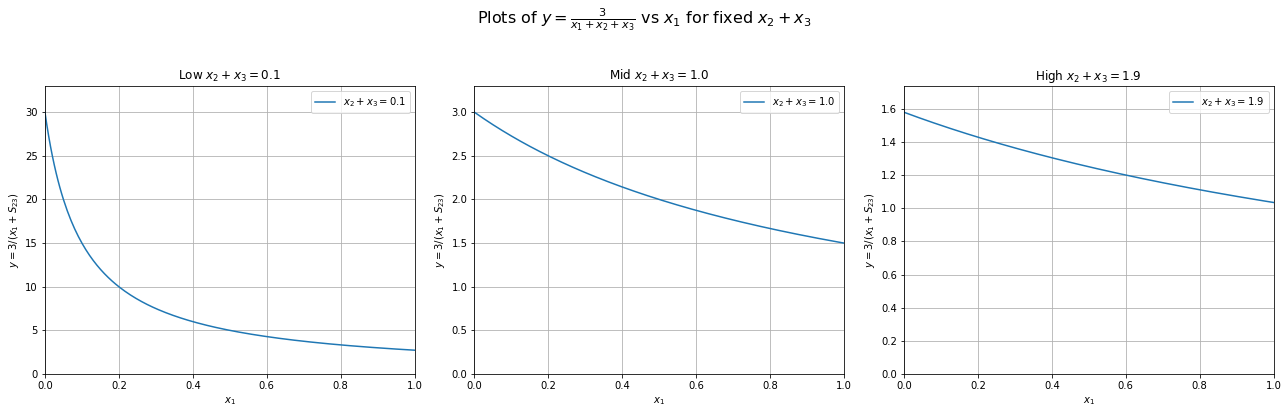

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def calculate_y(x1, S23):
  """Calculates y = 3 / (x1 + S23) element-wise, handling potential division by zero."""
  sum_x = x1 + S23
  # Ensure denominator is not zero before division
  # In these specific examples S23 > 0, so sum_x > 0 for x1>=0.
  # Use np.where for vectorized conditional calculation:
  # If sum_x > 0, calculate 3.0 / sum_x, otherwise return np.inf.
  # This handles both scalar and array inputs correctly.
  return np.where(sum_x > 0, 3.0 / sum_x, np.inf)

# Generate x1 values
x1_values = np.linspace(0, 1, 200) # Use more points for smoother curve near asymptotes

# --- Define the fixed sums S23 = x2 + x3 ---
S23_low = 0.1 # Example: x2=0.05, x3=0.05
S23_mid = 1.0 # Example: x2=0.5, x3=0.5
S23_high = 1.9 # Example: x2=0.95, x3=0.95

# Calculate corresponding y values
# calculate_y now correctly handles the numpy array x1_values
y_values_low = calculate_y(x1_values, S23_low)
y_values_mid = calculate_y(x1_values, S23_mid)
y_values_high = calculate_y(x1_values, S23_high)

# Create the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Adjusted figure size slightly
fig.suptitle(r'Plots of $y = \frac{3}{x_1 + x_2 + x_3}$ vs $x_1$ for fixed $x_2+x_3$', fontsize=16)


# Plot 1
axes[0].plot(x1_values, y_values_low, label=f'$x_2+x_3 = {S23_low}$')
axes[0].set_title(f'Low $x_2+x_3 = {S23_low}$')
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$y = 3 / (x_1 + S_{23})$')
axes[0].set_xlim([0, 1])
# Calculate y-range dynamically based on calculated values
# calculate_y works for scalar inputs too (returns 0-d array, handled by matplotlib)
min_y_low = calculate_y(1, S23_low)
max_y_low = calculate_y(0, S23_low)
axes[0].set_ylim([0, max_y_low * 1.1]) # Extend y-axis slightly beyond max value
axes[0].grid(True)
axes[0].legend()

# Plot 2
axes[1].plot(x1_values, y_values_mid, label=f'$x_2+x_3 = {S23_mid}$')
axes[1].set_title(f'Mid $x_2+x_3 = {S23_mid}$')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$y = 3 / (x_1 + S_{23})$')
axes[1].set_xlim([0, 1])
min_y_mid = calculate_y(1, S23_mid)
max_y_mid = calculate_y(0, S23_mid)
axes[1].set_ylim([0, max_y_mid * 1.1])
axes[1].grid(True)
axes[1].legend()

# Plot 3
axes[2].plot(x1_values, y_values_high, label=f'$x_2+x_3 = {S23_high}$')
axes[2].set_title(f'High $x_2+x_3 = {S23_high}$')
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$y = 3 / (x_1 + S_{23})$')
axes[2].set_xlim([0, 1])
min_y_high = calculate_y(1, S23_high)
max_y_high = calculate_y(0, S23_high)
axes[2].set_ylim([0, max_y_high * 1.1])
axes[2].grid(True)
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()